# 
this notebook reviews and explains the output of `ub_diffusion_net.py`

In [1]:
import pandas as pd
import blocksci
import numpy as np
import zarr
import networkx as nx
import matplotlib.pyplot as plt

DIR_RES = "/home/nvalla/paint-black/uniform_black/"
heur2_day_file = DIR_RES + "heur_2_data/diffusion_net_day.csv.old"
DIR_STATS = "/mnt/hdd_data/blockchain_parsed/bitcoin/"
heur2_day_stats = DIR_STATS + "CALC-bitcoin-heur-2_day-network_base.csv"
# DIR_PARSED="/mnt/hdd_data/blockchain_parsed/"
# cfg_file = f"/mnt/hdd_data/blockchain_parsed/bitcoin.cfg" # later
# chain = blocksci.Blockchain(cfg_file)

# heur=2, freq=day, curr=BTC
`python3 ub_diffusion_net.py --curr=BTC --heur=2 --freq=day`

In [2]:
df = pd.read_csv(heur2_day_file)

# temporary hack
for i in range(len(df.date)):
    while len(df.date[i])<10:
        df.date[i] += "2"

# convert to datetime object
df.date = pd.to_datetime(df.date, yearfirst=True)

data = ['no_old_black_user', 
        'no_new_black_user',
        'no_active_black_user',
        'no_cum_black_user', 
        'black2new_no_trx',
        'black2new_value', 
        'black2new_no_link', 
        'black2black_no_trx',
        'black2black_value', 
        'black2black_no_link', 
        'not_black_link']

<ipython-input-2-bc94f5e00576>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.date[i] += "2"


### network base stats
we add up some basic stats we need

In [3]:
df_stats = pd.read_csv(heur2_day_stats)
# print(df_stats.columns)

# include info in df
df['no_nodes'] = df_stats.no_nodes
df['no_edges'] = df_stats.no_edges

### sanity check

the number of edges is correct

In [4]:
(df['no_edges'] == df.not_black_link+df.black2black_no_link+df.black2new_no_link).all()

True

## Plot: number of active black user per day

This is the number of users active in each daily network. 
Active black users are users present in the daily network(they participated in at least a transaction in the daily network) belong to two different classes:
1. users who were black at the start of the daily network
2. users which become black via diffusion in the daily network

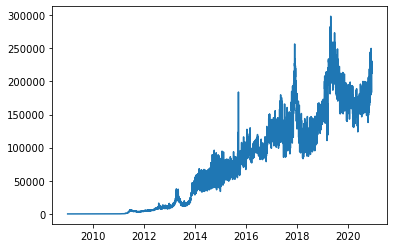

In [8]:
plt.figure()

plt.plot(
    df.date,
    df.no_active_black_user
)

plt.show()

# Plot: number of new black node per day
New black nodes are nodes which become black via diffusion on the daily network.
Once a user became black it cannot be counted again as a new black user.

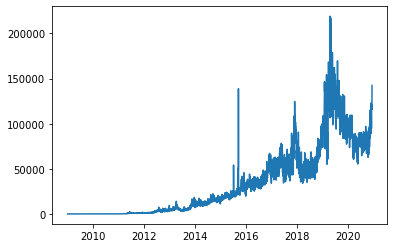

In [11]:
plt.figure()

plt.plot(
    df.date,
    df.no_new_black_user
)

plt.show()

# Plot: number of cumulative black users
Black nodes cumulative over time

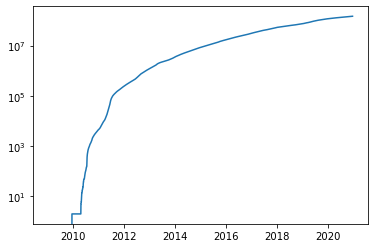

In [9]:
plt.figure()

plt.plot(
    df.date,
    df.no_cum_black_user
)


plt.yscale("log")
plt.show()

# Plot: active, new, old, cumulative users
- old black users are users who happear on the daily network and are already black before the diffusion trought transactions(the set is larger than ground truth users)

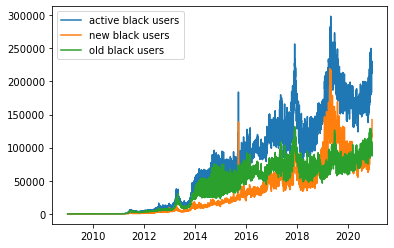

In [49]:
plt.figure()


plt.plot(
    df.date,
    df.no_active_black_user,
    label='active black users'
)

plt.plot(
    df.date,
    df.no_new_black_user,
    label='new black users'
)
plt.plot(
    df.date,
    df.no_old_black_user,
    label='old black users'
)

# plt.yscale("log")
plt.legend()
plt.show()

# Plot: mixing evolution

We are interested in studying how black nodes mix with normal nodes over time

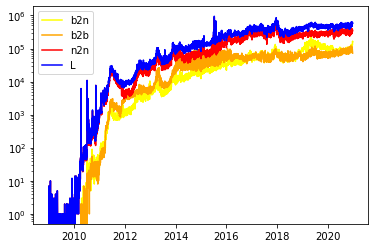

In [23]:
plt.figure()

plt.plot(
    df.date,
    df.black2new_no_link,
    label = "b2n",
    color='yellow'
)

plt.plot(
    df.date,
    df.black2black_no_link,
    label = "b2b",
    color='orange'
)

plt.plot(
    df.date,
    df.not_black_link,
    label = "n2n",
    color='red'
)

plt.plot(
    df.date,
    df.no_edges,
    label = "L",
    color='blue'
)

plt.legend()

plt.yscale("log")
plt.show()

* `b2n`: no. of links from previous black nodes to new nodes which become black for the first time
* `b2b`: no. of links from previous black nodes to previous black nodes
* `n2n`: no. of links between not black nodes

the following formula holds:
$$
L = L^{b2n} + L^{b2n} + L^{n2n}
$$

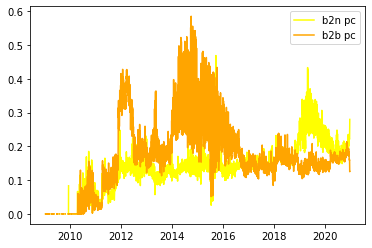

In [25]:
plt.figure()

plt.plot(
    df.date,
    df.black2new_no_link/df.no_edges,
    label = "b2n pc",
    color='yellow'
)

plt.plot(
    df.date,
    df.black2black_no_link/df.no_edges,
    label = "b2b pc",
    color='orange'
)

plt.legend()

plt.show()

From this last figure I understand two main things:
- we can identify two periods: from 2012 top 2016 more links between black nodes than outside, after 2018 until 2020 more spreading to new nodes than among black to black nodes
- the number of black spreading links decreases as a percentage over the total number of links.

### questions
- when was the ground truth collected? The collection period may explain the difference in volumes between b2b and b2n depending on time.

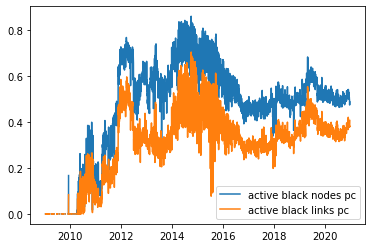

In [29]:
plt.figure()

plt.plot(
    df.date,
    df.no_active_black_user/df.no_nodes,
    label = "active black nodes pc",
)

plt.plot(
    df.date,
    (df.no_edges - df.not_black_link)/df.no_edges,
    label = "active black links pc",
)


plt.legend()

plt.show()

the number of active black nodes as a percentage over the total number of nodes is larger than the percentage of active black links. 

question: **Are black nodes somewhat less active?**

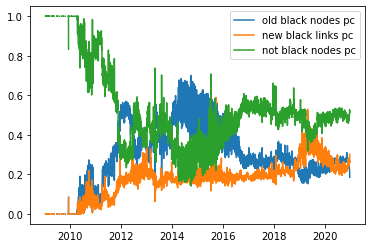

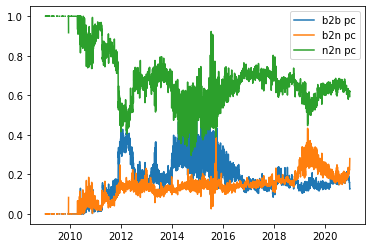

In [11]:
plt.figure()

plt.plot(
    df.date,
    df.no_old_black_user/df.no_nodes,
    label = "old black nodes pc",
)

plt.plot(
    df.date,
    df.no_new_black_user/df.no_nodes,
    label = "new black links pc",
)

plt.plot(
    df.date,
    (df.no_nodes - df.no_old_black_user - df.no_new_black_user)/df.no_nodes,
    label = "not black nodes pc",
)


plt.legend()

plt.show()

plt.figure()

plt.plot(
    df.date,
    df.black2black_no_link/df.no_edges,
    label = "b2b pc",
)

plt.plot(
    df.date,
    df.black2new_no_link/df.no_edges,
    label = "b2n pc",
)

plt.plot(
    df.date,
    df.not_black_link/df.no_edges,
    label = "n2n pc",
)


plt.legend()

plt.show()

# next steps:

- retrieve ground truth users first appearence on blockchain
- black nodes mixing: 
    * modified modularity:
        $$
            \sum_{v \in \text{black nodes}, w \in \text{not black nodes}} \left(a_{vw} - \frac{k^{out}_v k^{in}_w + k^{in}_v k^{out}_w}{2m} \right)
        $$
        The difference measures the difference between actual links between blacknnodes and not. 
        cons: it is not normalized. hard to interpretate.
    * DBCM randomization: we cand define the z-score on the DBCM ensemble:
        $$
        z = \frac{L_{b2n} - \langle L_{b2n} \rangle}{\sigma[L_{b2n}]}
        $$
        this should measure wheter the amount of mixing(diffusion) of black nodes is more or less than a randomized version.
        this may work better.
        